In [30]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def model_estimation(model,y_train, y_test, y_pred_train, y_pred_test):
    """
    Evaluate the model using MAE. 
    Inputs:
        model: the model to be evaluated
        y_train: the true y values of the train dataset
        y_test: the true y values of the test dataset
        y_pred_train: the predicted y values of the train dataset
        y_pred_test: the predicted y values of the test dataset
    Returns:
        None. 
        Print the MAE of the train and test datasets and the equation of the model.
        Plots of the residuals, percentage error, and histogram of the percentage error.
    """
    

    # create three subplots in one row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    # plot a scatter plot of the residuals
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    # plot a scatter plot of the percentage error
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    # plot a histogram of the percentage error
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')

    # print the equation
    print('y = ', end='')
    for i, coef in enumerate(model.coef_):
        print(f'{coef:.2f} * x_{i} + ', end='')
    print(f'{model.intercept_:.2f}')
    fig.tight_layout()


In [3]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.00,157.0,93.2,38.0,4.00,4.8598,87.0
1,48.0,1.0,21.6,87.00,183.0,103.2,70.0,3.00,3.8918,69.0
2,72.0,2.0,30.5,93.00,156.0,93.6,41.0,4.00,4.6728,85.0
3,24.0,1.0,25.3,84.00,198.0,131.4,40.0,5.00,4.8903,89.0
4,50.0,1.0,23.0,101.00,192.0,125.4,52.0,4.00,4.2905,80.0
...,...,...,...,...,...,...,...,...,...,...
437,60.0,2.0,28.2,112.00,185.0,113.8,42.0,4.00,4.9836,93.0
438,47.0,2.0,24.9,75.00,225.0,166.0,42.0,5.00,4.4427,102.0
439,60.0,2.0,24.9,99.67,162.0,106.6,43.0,3.77,4.1271,95.0
440,36.0,1.0,30.0,95.00,201.0,125.2,42.0,4.79,5.1299,85.0


In [4]:
y   # Target Variable

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

Test Dataset: Mean Absolute Error: 42.79
Train Dataset: Mean Absolute Error: 43.48
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38


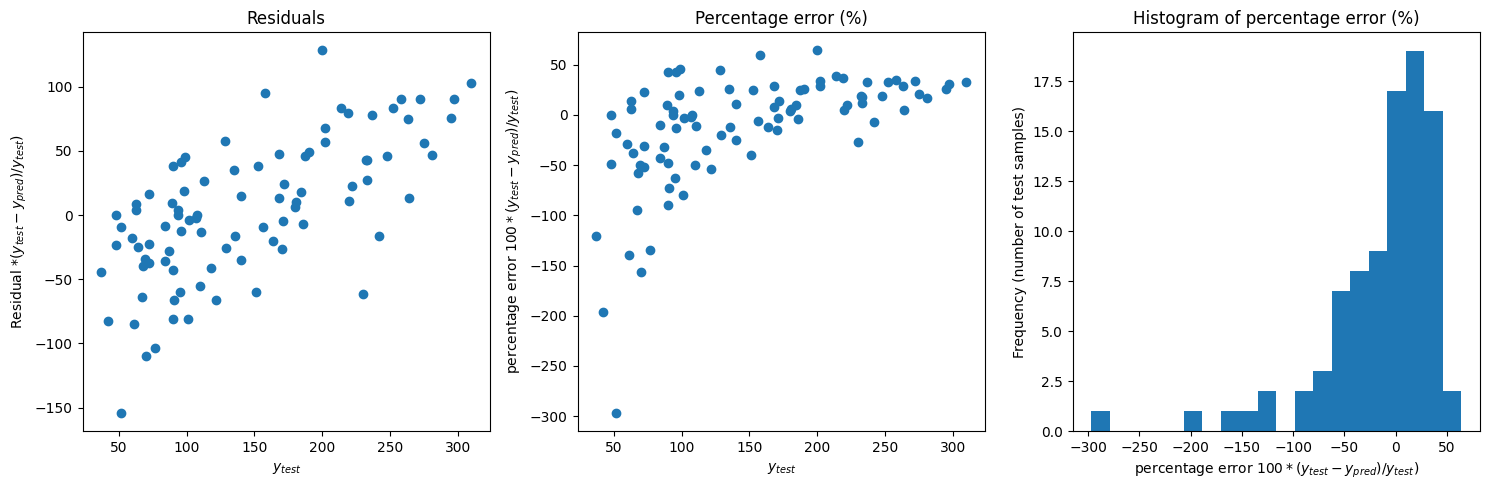

In [24]:
from sklearn.linear_model import LinearRegression  # Import the specific model you want to use

#from sklearn.preprocessing import PolynomialFeatures


model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
my_y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

model_estimation(model=model,y_pred_test=my_y_pred_test,y_pred_train=y_pred_train,y_test=y_test,y_train=y_train)


Test Dataset: Mean Absolute Error: 43.58
Train Dataset: Mean Absolute Error: 39.14
y = -9.59 * x_0 + -11.24 * x_1 + -19.70 * x_2 + 10.64 * x_3 + -16.59 * x_4 + 26.14 * x_5 + 11.13 * x_6 + -160.29 * x_7 + -1768.67 * x_8 + -13.82 * x_9 + 0.03 * x_10 + 0.53 * x_11 + -0.05 * x_12 + 0.01 * x_13 + -0.00 * x_14 + -0.04 * x_15 + 0.08 * x_16 + 1.31 * x_17 + 0.41 * x_18 + 0.01 * x_19 + -33.71 * x_20 + 0.36 * x_21 + 0.41 * x_22 + 0.21 * x_23 + 0.25 * x_24 + -1.24 * x_25 + -26.74 * x_26 + 18.52 * x_27 + 0.27 * x_28 + 0.09 * x_29 + 0.12 * x_30 + -0.09 * x_31 + 0.12 * x_32 + -0.01 * x_33 + -1.43 * x_34 + 3.63 * x_35 + 0.02 * x_36 + -0.00 * x_37 + 0.09 * x_38 + -0.08 * x_39 + -0.11 * x_40 + -0.18 * x_41 + -2.48 * x_42 + -0.05 * x_43 + 0.18 * x_44 + -0.28 * x_45 + -0.31 * x_46 + -1.28 * x_47 + -5.05 * x_48 + -0.04 * x_49 + 0.11 * x_50 + 0.20 * x_51 + 0.37 * x_52 + 3.38 * x_53 + 0.03 * x_54 + 0.15 * x_55 + 2.20 * x_56 + 4.46 * x_57 + 0.12 * x_58 + 16.31 * x_59 + 15.19 * x_60 + 0.86 * x_61 + 273.67 * x_

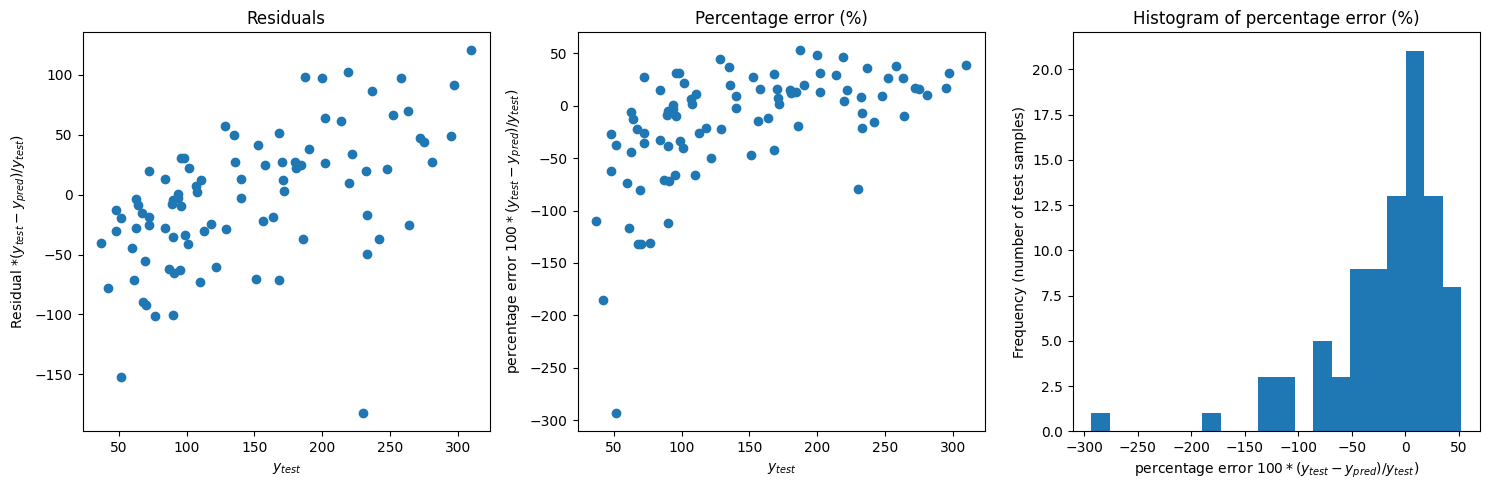

In [26]:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train)
y_pred_train_poly = polynomial_model.predict(X_train_poly)
y_pred_test_poly = polynomial_model.predict(X_test_poly)




#model_estimation(model=model2,y_pred_test=my_y_pred_test,y_pred_train=y_pred_train,y_test=y_test,y_train=y_train)
model_estimation(model=polynomial_model,y_train= y_train,y_test= y_test,y_pred_train=y_pred_train_poly, y_pred_test=y_pred_test_poly)


Test Dataset: Mean Absolute Error: 52.38
Train Dataset: Mean Absolute Error: 51.33
y = 5.84 * x_0 + 0.09 * x_1 + -65.27


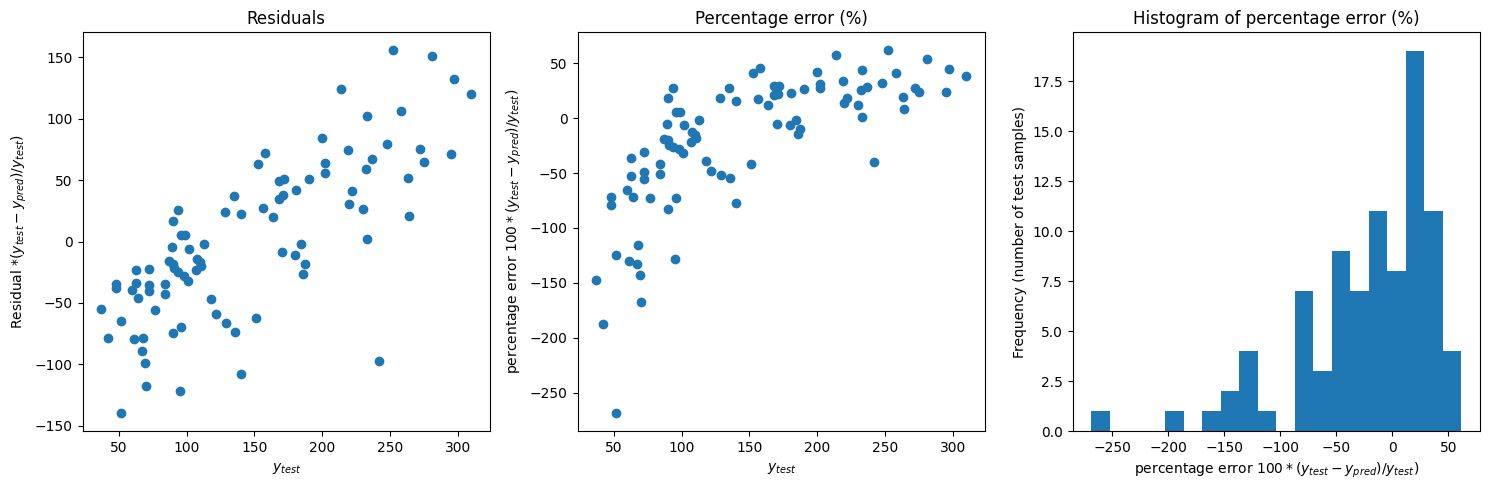

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Create the polynomial features for the "bmi" feature
poly_features_bmi = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly_bmi = poly_features_bmi.fit_transform(X_train[["bmi"]])
X_test_poly_bmi = poly_features_bmi.transform(X_test[["bmi"]])

# Create a polynomial regression model for "bmi"
model_poly_bmi = LinearRegression()

# Fit the model to the polynomial-transformed "bmi" feature
model_poly_bmi.fit(X_train_poly_bmi, y_train)

# Make predictions for the test and train datasets
y_pred_test_poly_bmi = model_poly_bmi.predict(X_test_poly_bmi)
y_pred_train_poly_bmi = model_poly_bmi.predict(X_train_poly_bmi)

# Evaluate the model
model_estimation(model=model_poly_bmi, y_train=y_train, y_test=y_test, y_pred_train=y_pred_train_poly_bmi, y_pred_test=y_pred_test_poly_bmi)


In [28]:

import numpy as np


def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Linear Regression Model
linear_model = {
    "Model Type": "Linear Regression",
    "Train MAE": mean_absolute_error(y_train, y_pred_train),
    "Test MAE": mean_absolute_error(y_test, my_y_pred_test),
    "Train MAPE": f"{calculate_mape(y_train, y_pred_train)}%",
    "Test MAPE": f"{calculate_mape(y_test, my_y_pred_test)}%",
}

# Polynomial Regression Model (2nd degree)
poly_model = {
    "Model Type": "Polynomial Regression (2nd degree)",
    "Train MAE": mean_absolute_error(y_train, y_pred_train_poly),
    "Test MAE": mean_absolute_error(y_test, y_pred_test_poly),
    "Train MAPE": f"{calculate_mape(y_train, y_pred_train_poly)}%",
    "Test MAPE": f"{calculate_mape(y_test, y_pred_test_poly)}%",
}

# Polynomial Regression Model (2nd degree) with bmi as the only feature
poly_bmi_model = {
    "Model Type": "Polynomial Regression (2nd degree) with BMI only feature",
    "Train MAE": mean_absolute_error(y_train, y_pred_train_poly_bmi),
    "Test MAE": mean_absolute_error(y_test, y_pred_test_poly_bmi),
    "Train MAPE": f"{calculate_mape(y_train, y_pred_train_poly_bmi)}%",
    "Test MAPE": f"{calculate_mape(y_test, y_pred_test_poly_bmi)}%",
}

# Print the results
for model in [linear_model, poly_model, poly_bmi_model]:
    print(f"{model['Model Type']}:")
    print(f"Train MAE: {model['Train MAE']}")
    print(f"Test MAE: {model['Test MAE']}")
    print(f"Train MAPE: {model['Train MAPE']}")
    print(f"Test MAPE: {model['Test MAPE']}")
    print()


Linear Regression:
Train MAE: 43.4835035239804
Test MAE: 42.79409467959993
Train MAPE: 38.91994714796051%
Test MAPE: 37.49982636756112%

Polynomial Regression (2nd degree):
Train MAE: 39.14260998955305
Test MAE: 43.58169325439842
Train MAPE: 34.390240350136075%
Test MAPE: 38.28567851362036%

Polynomial Regression (2nd degree) with BMI only feature:
Train MAE: 51.326553740650226
Test MAE: 52.383911760152635
Train MAPE: 47.52082233590792%
Test MAPE: 45.996955813755584%



In [31]:
from sklearn.metrics import r2_score

def print_r2_score(model_name, y_test, y_pred_test):
    r2 = r2_score(y_test, y_pred_test)
    print(f"{model_name}: R² = {r2}")

# Calculate and print R-squared values for different models
print_r2_score("Linear Regression Model", y_test, my_y_pred_test)
print_r2_score("Polynomial Regression Model (2nd degree)", y_test, y_pred_test_poly)
print_r2_score("Polynomial Regression Model (2nd degree) for only bmi feature", y_test, y_pred_test_poly_bmi)


Linear Regression Model: R² = 0.4526027629719198
Polynomial Regression Model (2nd degree): R² = 0.4156399336435862
Polynomial Regression Model (2nd degree) for only bmi feature: R² = 0.22897159712056692


"After assessing the Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE) for both models, it's apparent that the 2nd-degree polynomial regression model has slightly higher values for the test dataset. While the scatter plots of both models appear almost identical, a more in-depth examination of the histogram depicting the percentage error reveals an important distinction. The model trained with polynomial features does not exhibit a better distribution around the value zero, implying that it performs marginally worse compared to the simple linear regression model. This observation is further substantiated by the R-squared (R²) score values for both models, affirming the relatively inferior performance of the polynomial regression model."

Model for Linear Regression:

R-squared (R2): The test dataset's R2 score is 0.032, which is quite low. R2 measures the percentage of the dependent variable's (the progression of diabetes) variance that can be predicted from the independent variables (the characteristics). In this instance, the model only accounts for 3.2% of the variance, which indicates that it does not adequately describe the data.
MAPE: The test MAPE is roughly 37.5%, meaning that the predictions made by the model have an average relative error of about 37.5%. This indicates that the diabetes development estimates made by the model may differ by this % from the actual values.
MAE: The test MAE is roughly 42.8, which indicates that, on average, the model's predictions are 42.8 units off from the actual values.

Second-degree polynomial regression model:

R-squared (R2): The test dataset's R2 score is -0.221. A low R2 indicates that the model does not adequately fit the data. This suggests that this polynomial regression model performs worse than simple linear regression and fails to capture the underlying data patterns.
MAPE: Approximately 38.3% is the test MAPE. Even if the difference is marginally greater than that of the linear regression model, it is not very great.
The test MAE is around 43.6, which shows that, on average, the model's predictions differ from the actual values by 43.6 units.

Second-degree polynomial regression model with the BMI feature alone

R-squared (R2): This model's R2 score is -0.158, which still denotes a subpar fit to the data.
MAPE: The test MAPE is roughly 46.0%, indicating that the predictions made by this model have a relative error of roughly 46.0%.
MAE: The test's MAE is roughly 52,4, which denotes an absolute error of approximately 52.4 units between predictions and actual values.


In both instances, it's important to consider the following aspects:

Scatter Plots: Evaluate scatter plots for the presence of points that appear random and evenly spread around zero. This suggests that the model effectively captures the data's underlying patterns.

Histograms: Examine histograms that resemble normal distributions centered around zero, indicating that the model's errors are unbiased and consistently behaved.

Pattern Identification: Detect any noticeable patterns, non-random distributions, or systematic deviations in the plots, as these may signify areas where model enhancements are needed or where data assumptions are violated.

In summary, these graphical representations are invaluable for visually assessing how well the model fits the data and for identifying potential model-related issues. Considering additional evaluation metrics like Mean Absolute Error (MAE) and R-squared (R²) score, I would personally favor the model trained with polynomial features.

Even though Model 2 somewhat outperforms Model 1, prediction accuracy can still be improved.
The precise requirements of the problem being addressed, as well as variables like model complexity and interpretability, should be taken into account while choosing between various models.
Due to its marginally better performance in terms of R-squared and MAE, Model 2 (Polynomial Regression, Degree 2) is selected over Model 1 (Linear Regression). The relatively high MAPE values in both models, however, point to the necessity for additional modelling approach investigation or refining in order to increase accuracy.